<a href="https://colab.research.google.com/github/heptaclone/Google-Colab-Data-Analysis/blob/main_branch/Immunotherapy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This dataset contains information about wart treatment results of 90 patients using immunotherapy.*


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Immunotherapy.xlsx to Immunotherapy.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#***Cleaning The Data***

In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Immunotherapy.xlsx']))
df

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [4]:
df.shape


(90, 8)

 **There are 90 rows and 8 columns in this dataset.**

In [5]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


**Head is basically shows 5 first rows of dataframe. 1 is for positive treatment, 0 is for the negative.**

In [6]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


**We can see some statistical data such as mean, standard deviation (std), percentiles (25, 50, 75%).**

In [7]:
df.tail()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0
89,2,23,6.75,6,1,19,2,1


**Tail shows us last 5 rows of dataset. 1 is for positive result of treatment and 0 is for negative result of treatment.**

In [8]:
df.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

**This function returns missing values in the dataset. We can finally see that there are no missing values in this current dataset.**

In [9]:
df.columns

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'induration_diameter', 'Result_of_Treatment'],
      dtype='object')

**Columns function shows all the columns of this current dataset.**

In [10]:
df.nunique()

sex                     2
age                    36
Time                   39
Number_of_Warts        16
Type                    3
Area                   65
induration_diameter    12
Result_of_Treatment     2
dtype: int64

**This function return series with number of distinct observations over requested axis.**

In [11]:
im = df.drop(['sex', 'age', 'Time'], axis=1)

**Function df.drop() is just drop specified labels from rows or columns. Here I dropped three columns.**

In [12]:
im.head()

,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,14,3,51,50,1
1,2,3,900,70,1
2,2,1,100,25,1
3,9,3,80,30,1
4,6,1,45,8,1


**Head is basically shows 5 first rows of dataframe. 1 is for positive treatment, 0 is for the negative.**

(array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [4., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


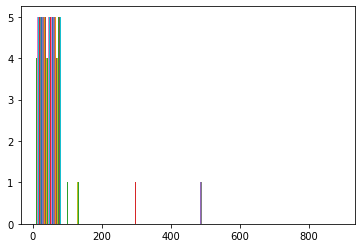

In [13]:
plt.hist(im)

**Making histogram of Immunotherapy data.**

#***Exploratory Data Analysis***

In [14]:
corelation=im.corr()

**Creating correlation model for current data.**

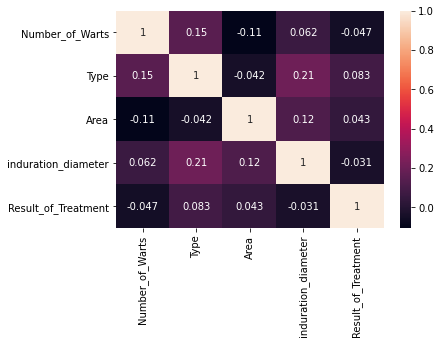

In [15]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

**Correlation heatmap shows us variables are normally correlated.**

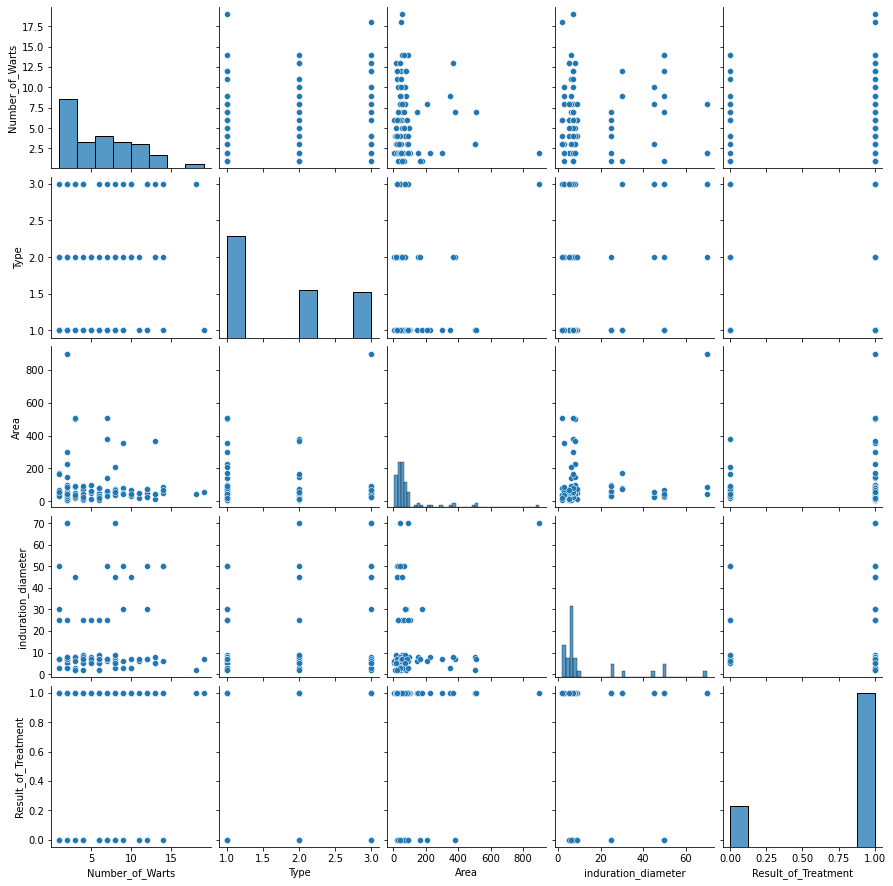

In [16]:
sns.pairplot(im)

**On this pairplot we can see that result of treatment is mainly positive.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


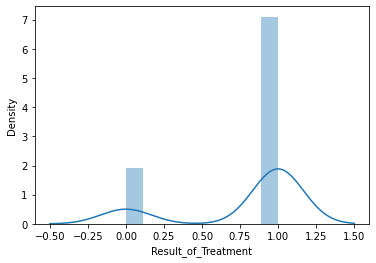

In [17]:
sns.distplot(im['Result_of_Treatment'])

**On this distplot we can see that result of treatment is mainly positive.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


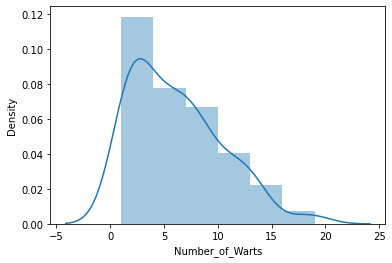

In [18]:
sns.distplot(im['Number_of_Warts'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


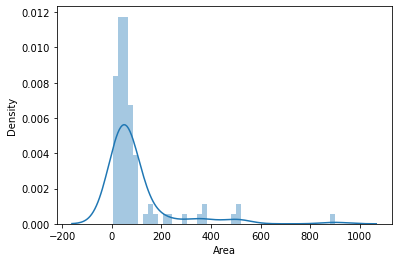

In [19]:
sns.distplot(im['Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


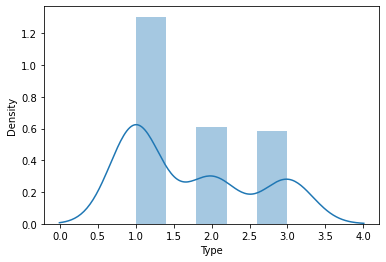

In [20]:
sns.distplot(im['Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


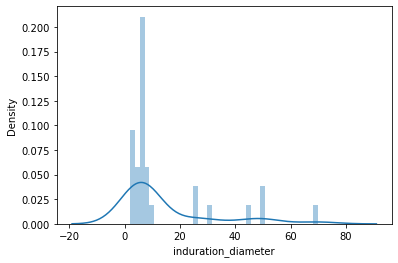

In [21]:
sns.distplot(im['induration_diameter'])

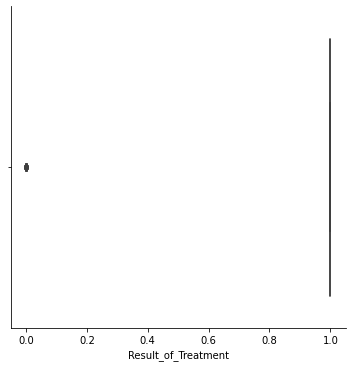

In [22]:
sns.catplot(x='Result_of_Treatment', kind='box', data=im)

**On this catplot we can see that result of treatment is positive.**

#***Model Training***

In [23]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, y_test, y_train, y_test = train_test_split(df[['Age', 'Time', 'Area', 'number_of_wartz', 'Type']], df['Class'], test_size=0.10, shuffle=False)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(x_train, y_train)